# EDAの例

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

## ユーザ評価ファイルの確認

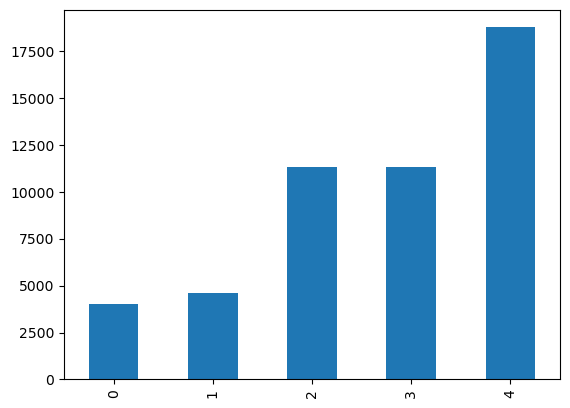

In [119]:
df = pd.read_csv("data/sushi_ratings.csv")
df["score"].value_counts().sort_index().plot(kind="bar")
plt.show()

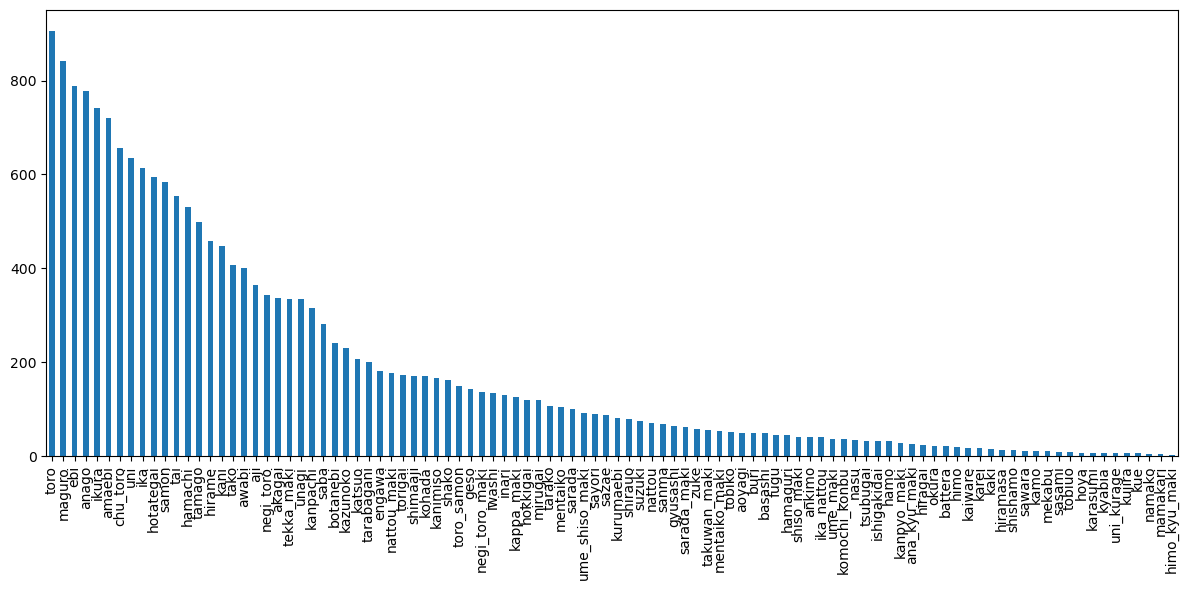

In [116]:
# 評価が4のデータだけを抽出して、アイテムの数を棒グラフで確認
plt.figure(figsize=(12, 6))
df[df["score"] == 4]["name"].value_counts().plot(kind="bar")
plt.xticks(rotation=90)
plt.tight_layout()

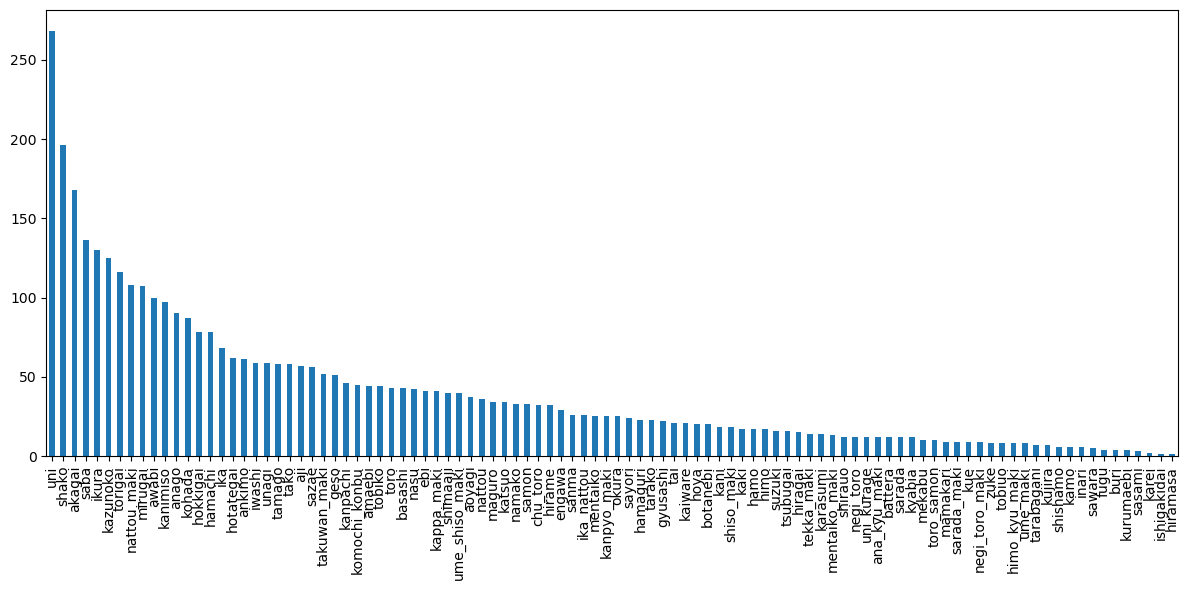

In [120]:
# 評価が0のデータだけを抽出して、アイテムの数を棒グラフで確認
plt.figure(figsize=(12, 6))
df[df["score"] == 0]["name"].value_counts().plot(kind="bar")
plt.xticks(rotation=90)
plt.tight_layout()

## 評価値予測ファイルの確認

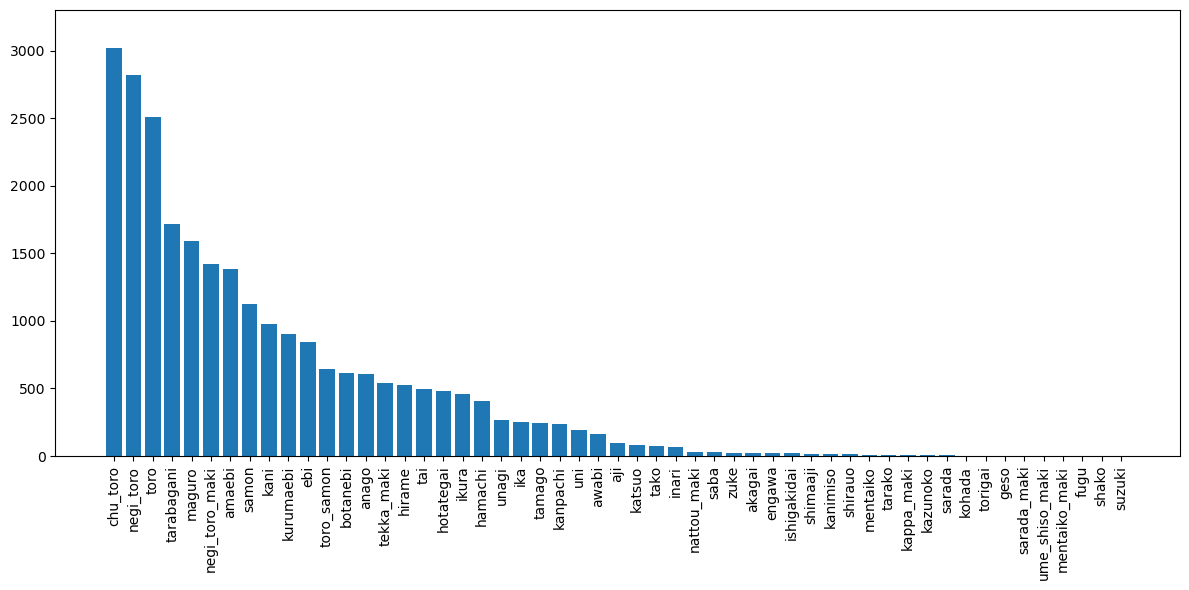

In [121]:
svd_df = pd.read_csv("data/svd_results.csv")
# svdで多く推薦された寿司(item_name列)の数を集計
count_df = svd_df["item_name"].value_counts().reset_index()
# 棒グラフでitem_nameごとの推薦回数を表示、item_nameのラベルは被らないように90度回転
plt.figure(figsize=(12, 6))
plt.bar(count_df["index"], count_df["item_name"])
plt.xticks(rotation=90)
plt.tight_layout()
# y軸上限は3200に設定
plt.ylim(0, 3300)
plt.show()

In [122]:
count_df.count()["item_name"]

53

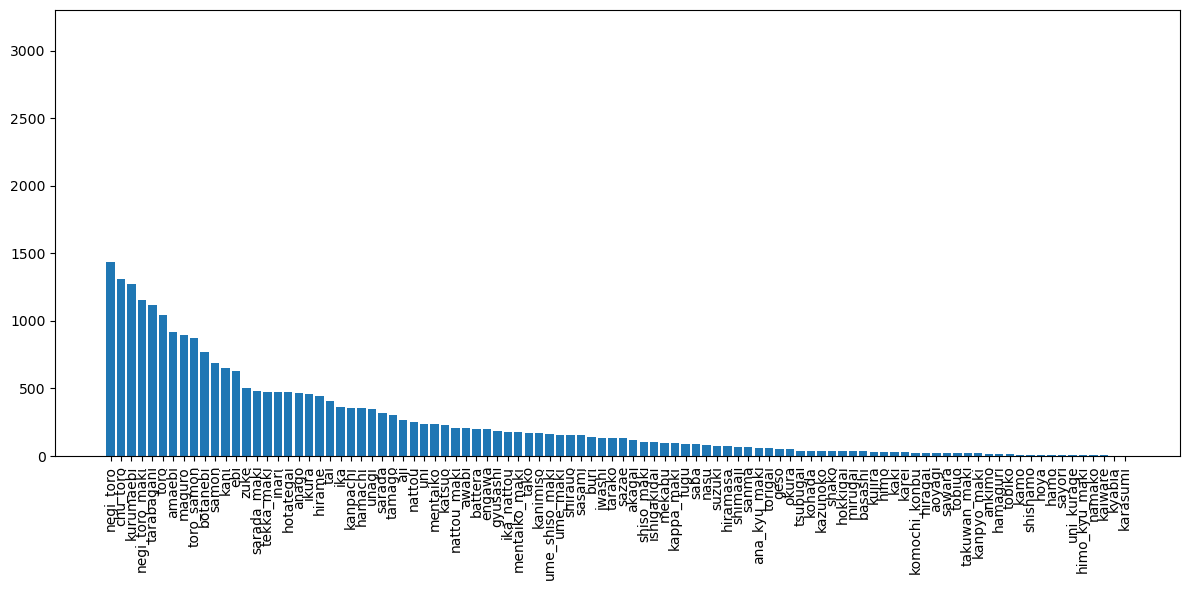

In [127]:
nmf_df = pd.read_csv("data/nmf_results.csv")
# nmfで多く推薦された寿司(item_name列)の数を集計
count_df = nmf_df["item_name"].value_counts().reset_index()
# 棒グラフでitem_nameごとの推薦回数を表示、item_nameのラベルは被らないように90度回転
plt.figure(figsize=(12, 6))
plt.bar(count_df["index"], count_df["item_name"])
plt.xticks(rotation=90)
plt.tight_layout()
# y軸上限は3200に設定
plt.ylim(0, 3300)
plt.show()

In [124]:
count_df.head(10)

,index,item_name
0,negi_toro,1433
1,chu_toro,1307
2,kurumaebi,1275
3,negi_toro_maki,1154
4,tarabagani,1115
5,toro,1044
6,amaebi,917
7,maguro,894
8,toro_samon,872
9,botanebi,769


In [125]:
count_df.count()["item_name"]

98

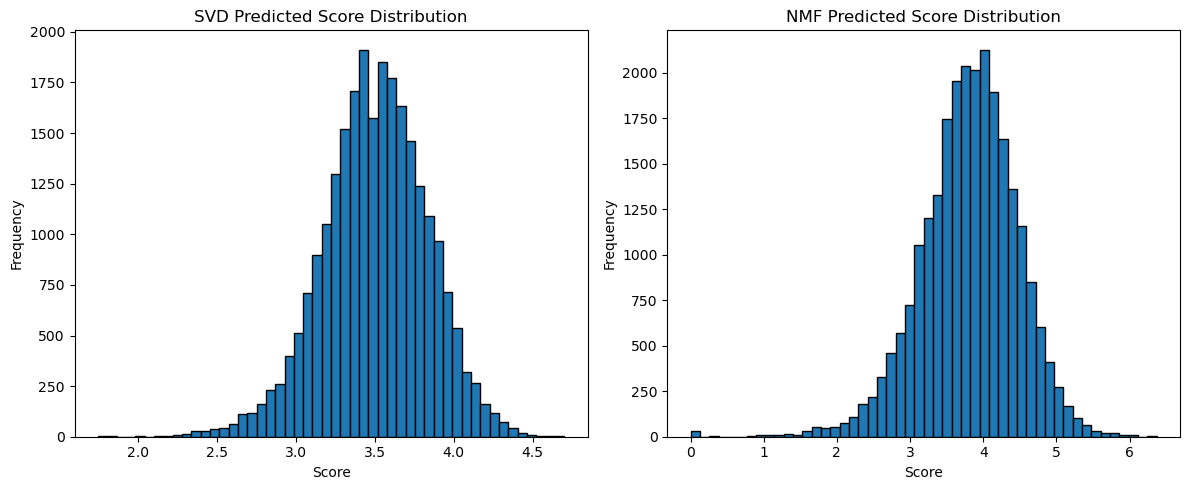

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(svd_df["predicted_score"], bins=50, edgecolor="black")
plt.title("SVD Predicted Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(nmf_df["predicted_score"], bins=50, edgecolor="black")
plt.title("NMF Predicted Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [101]:
# item_nameとモデルを引数に取り、その寿司にスコア4をつけたユーザーへの推薦を可視化する関数
def visualize_item_lovers_recommendation(item_name, model_name):
    print(f"{model_name} {item_name} Lovers Recommendations")
    df = pd.read_csv("data/sushi_ratings.csv")
    # item_nameにスコア4をつけたユーザーを特定
    item_lovers = df[(df["name"] == item_name) & (df["score"] == 4)]["user_id"]
    # これらのユーザーにrankが1として推薦されている他の寿司アイテムを分析
    if model_name == "svd":
        item_recommendations = svd_df[svd_df["user_id"].isin(item_lovers)].query(
            "rank == 1"
        )
    elif model_name == "nmf":
        item_recommendations = nmf_df[nmf_df["user_id"].isin(item_lovers)].query(
            "rank == 1"
        )
    # 推薦ランキングを集計
    recommendation_count = (
        item_recommendations["item_name"].value_counts().reset_index()
    )
    recommendation_count.columns = ["item_name", "count"]
    # 棒グラフで推薦回数を表示
    plt.figure(figsize=(12, 6))
    plt.bar(recommendation_count["item_name"], recommendation_count["count"])
    plt.xticks(rotation=90)
    plt.tight_layout()
    # 図のタイトル
    plt.title(f"{model_name} {item_name} Lovers Recommendations")
    plt.show()

svd chu_toro Lovers Recommendations


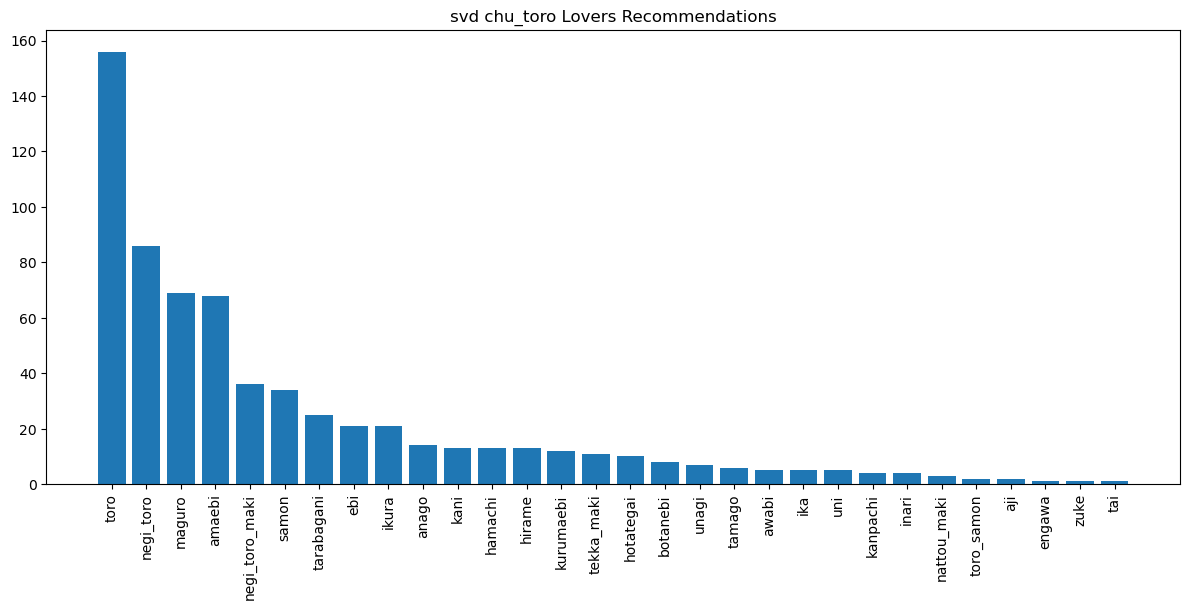

In [102]:
visualize_item_lovers_recommendation("chu_toro", "svd")

nmf chu_toro Lovers Recommendations


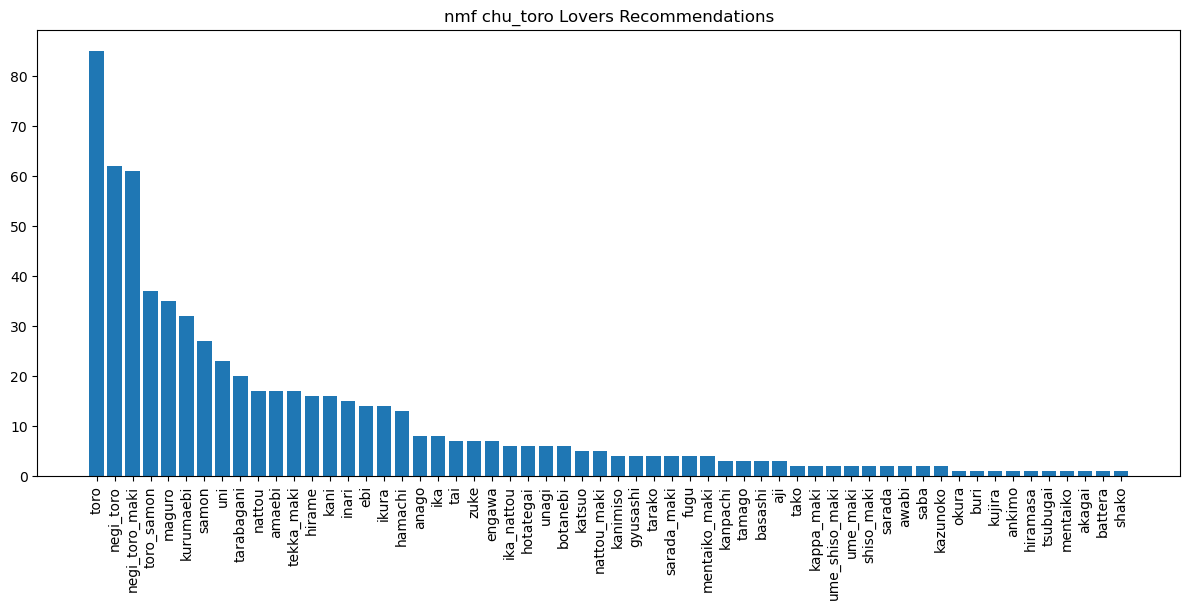

In [103]:
visualize_item_lovers_recommendation("chu_toro", "nmf")

svd geso Lovers Recommendations


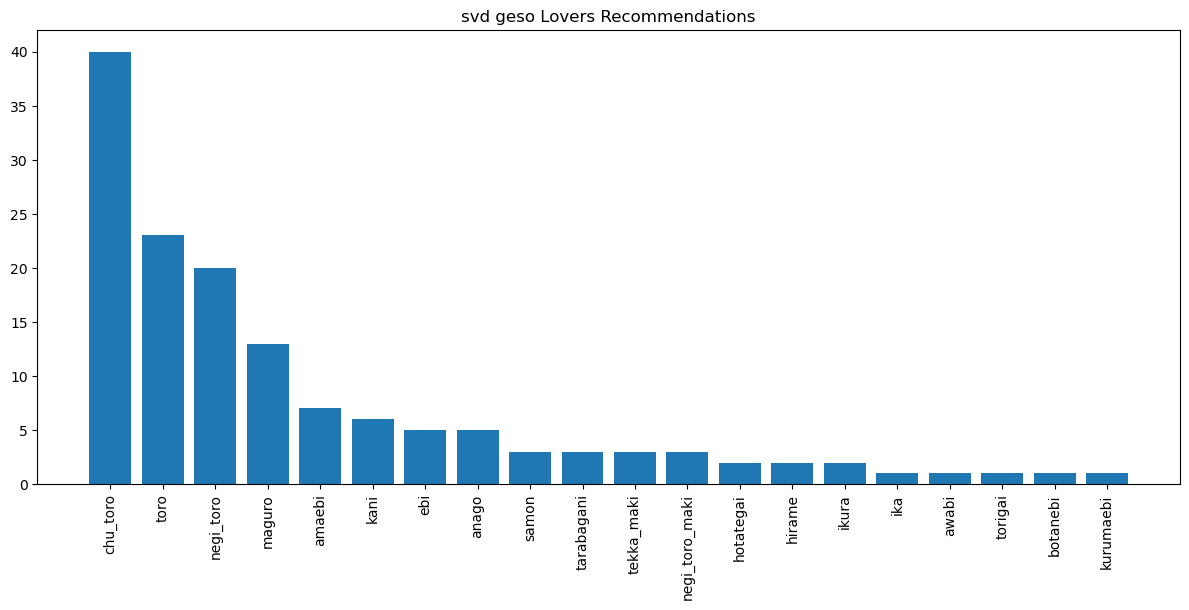

In [104]:
visualize_item_lovers_recommendation("geso", "svd")

nmf geso Lovers Recommendations


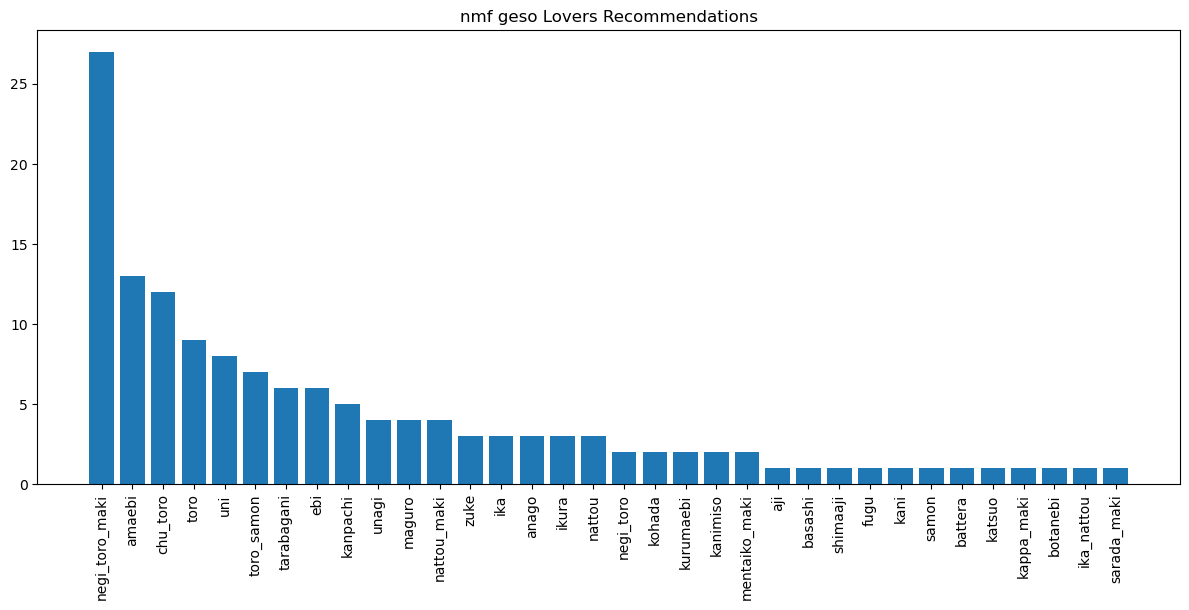

In [105]:
visualize_item_lovers_recommendation("geso", "nmf")

svd kappa_maki Lovers Recommendations


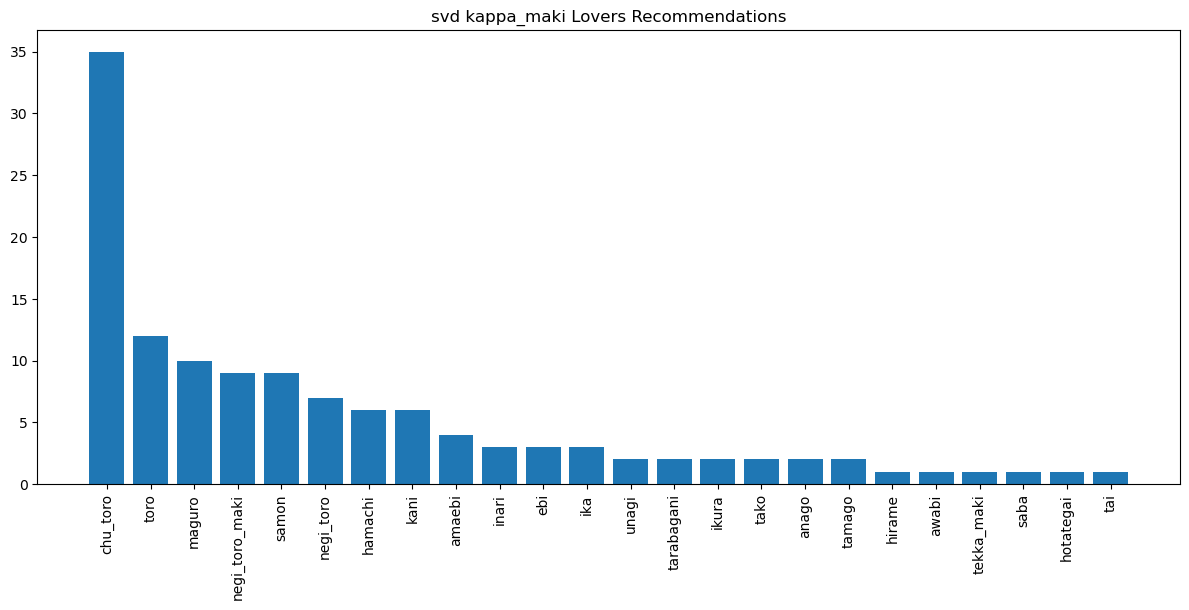

In [106]:
visualize_item_lovers_recommendation("kappa_maki", "svd")

nmf kappa_maki Lovers Recommendations


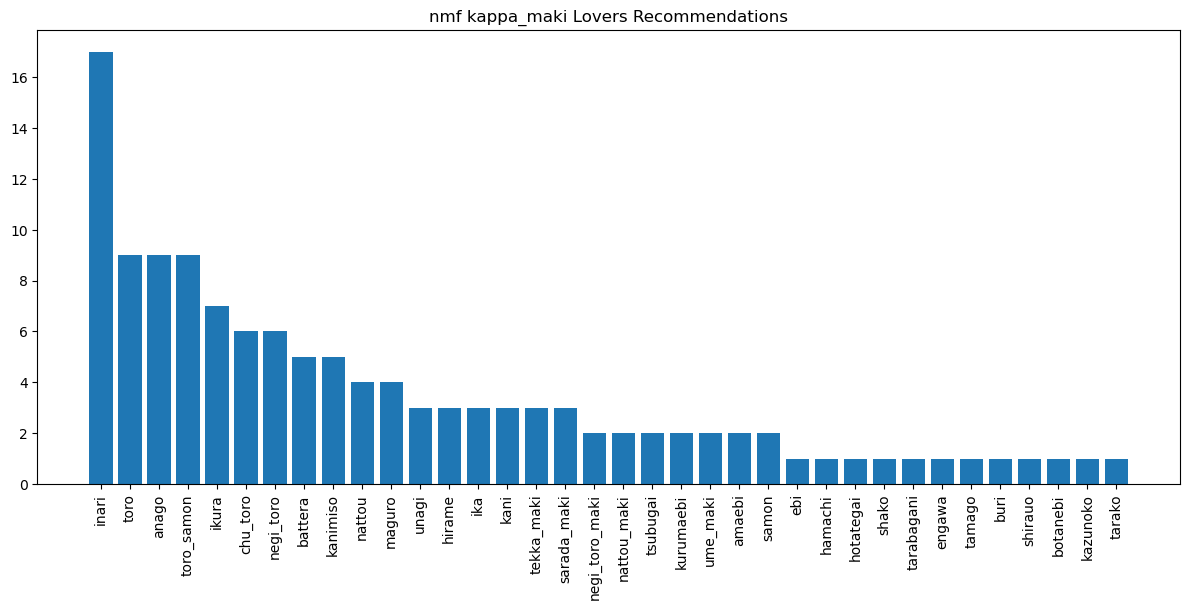

In [107]:
visualize_item_lovers_recommendation("kappa_maki", "nmf")